In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.head() # first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail() #last 5 rows

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Our Target variable is in float64

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can observe that there are no null values in data

In [9]:
df.shape

(1338, 7)

In this data there are total 1338 rows and 7 columns

In [10]:
X=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
for i in range(len(X)):
    print(X[i],'=',df[X[i]].nunique())

age = 47
sex = 2
bmi = 548
children = 6
smoker = 2
region = 4
charges = 1337


Check number of unique value in data

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [13]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [14]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Checking What are the unique values

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

male      676
female    662
Name: sex, dtype: int64


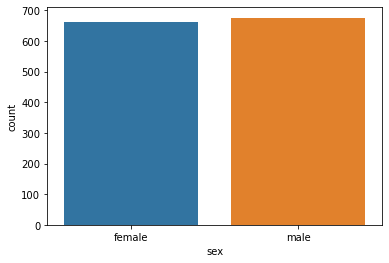

In [18]:
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

As we observe that male is greater than female

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


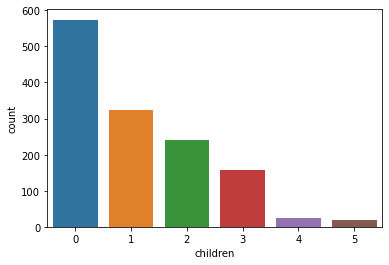

In [19]:
ax=sns.countplot(x='children',data=df)
print(df['children'].value_counts())

As we observed most of family has no children

no     1064
yes     274
Name: smoker, dtype: int64


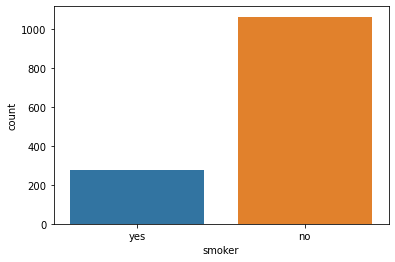

In [20]:
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

As we observe higher no. of people is non smoker

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


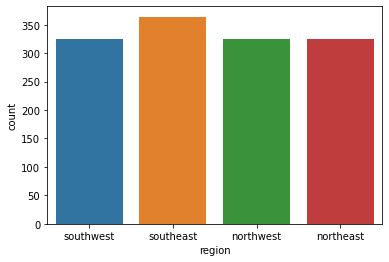

In [21]:
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

As we observe quite higher persons from southeast region

<AxesSubplot:xlabel='age', ylabel='Count'>

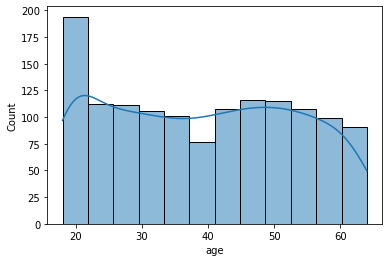

In [22]:
sns.histplot(x=df['age'],data=df,kde=True)

As we observe that most of person age is around 20

<AxesSubplot:xlabel='bmi', ylabel='Count'>

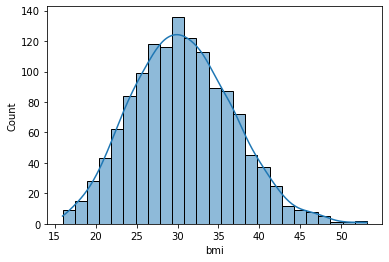

In [23]:
sns.histplot(x=df['bmi'],data=df,kde=True)

As we observe that most of person bim is around 30

# Encoding of DataFrame

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [25]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [26]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


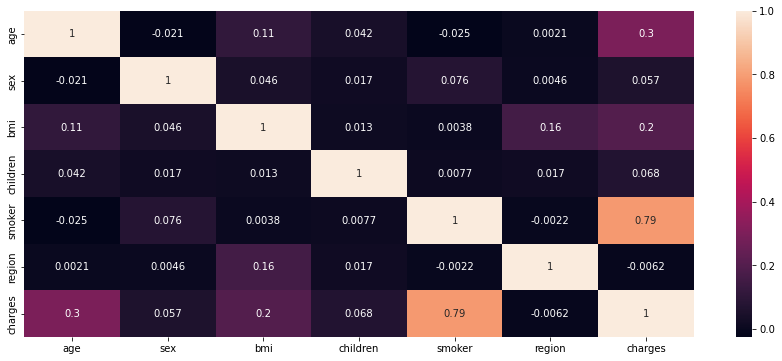

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

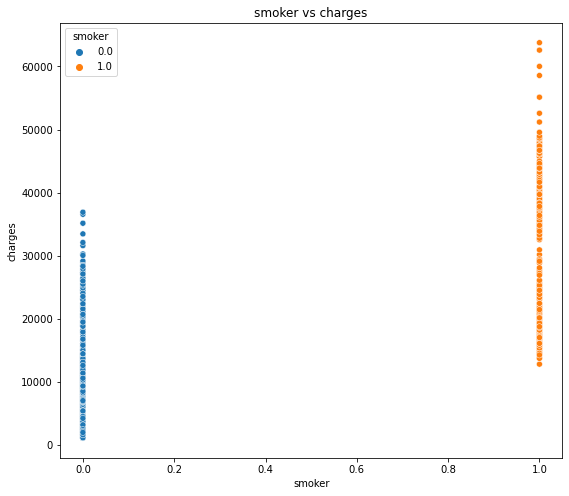

In [28]:
plt.figure(figsize=(9,8))
plt.title('smoker vs charges')
sns.scatterplot(df['smoker'],df['charges'],hue=df['smoker'])
plt.show()

As we obseve if the person is smoker than the charges is high

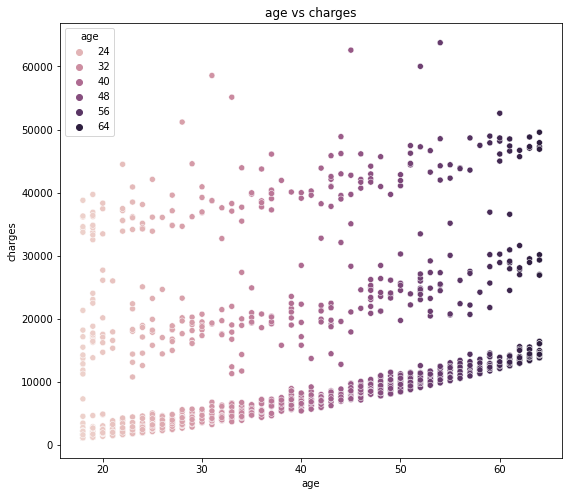

In [29]:
plt.figure(figsize=(9,8))
plt.title('age vs charges')
sns.scatterplot(df['age'],df['charges'],hue=df['age'])
plt.show()

Age is increas than charges will also increase

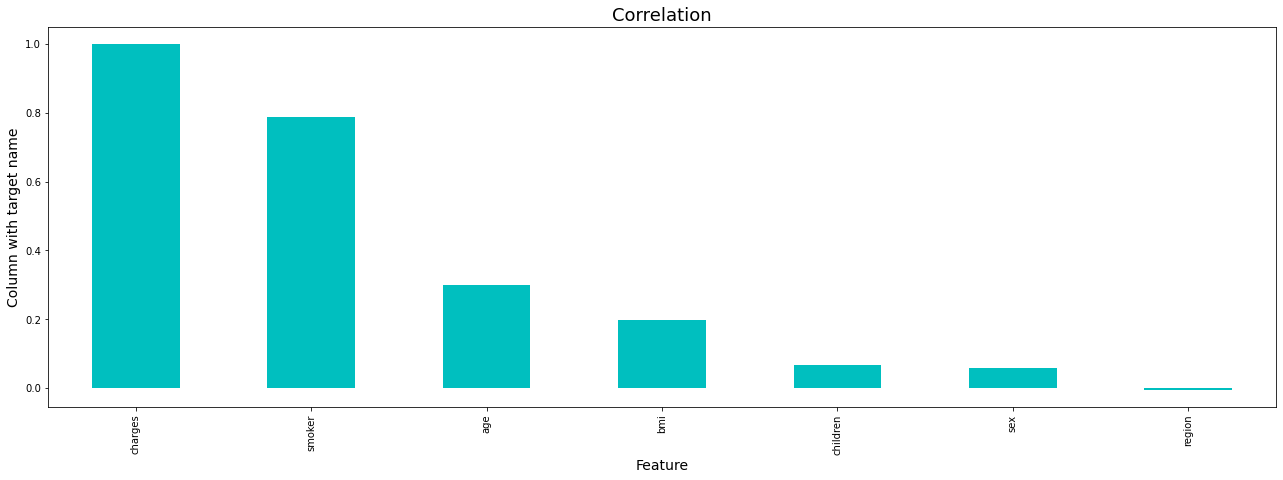

In [30]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Now check for skewness

In [31]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In this observation we have to consider only age,bmi,children columns

age


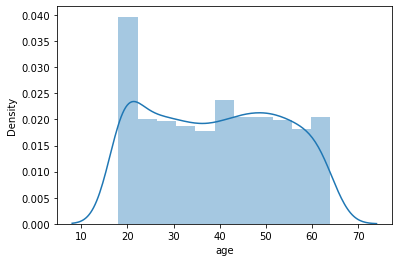

sex


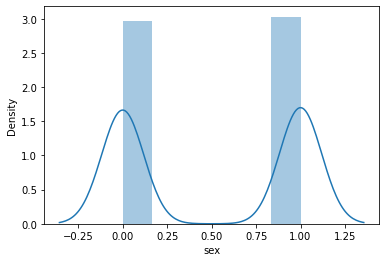

bmi


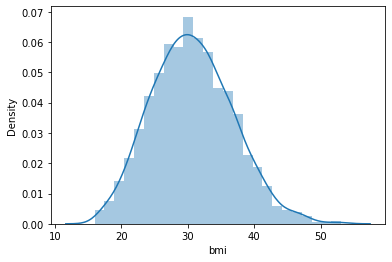

children


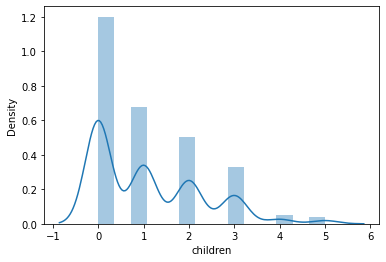

smoker


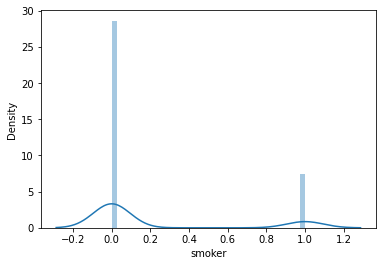

region


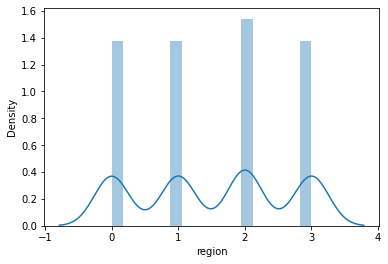

charges


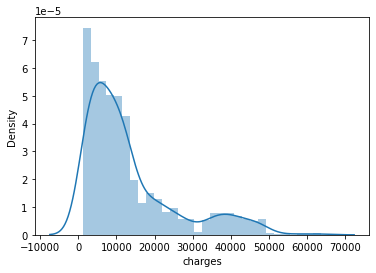

In [32]:
# plot all graph for check skewness
for x in df:
    print(x)
    plt.plot(figsize=(7,9))
    sns.distplot(df[x])
    plt.show()

All the skewness is acceptable rest of children

In [33]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


As we observe there are little bit outliers in BMI

# Now check for outliers 

age


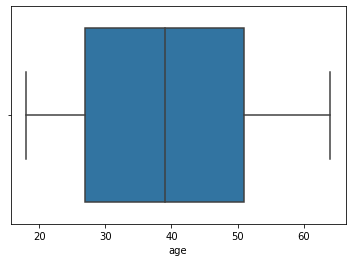

sex


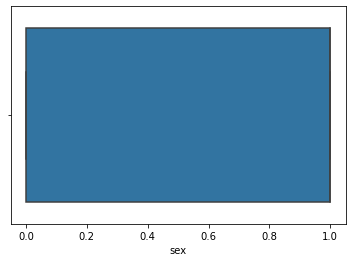

bmi


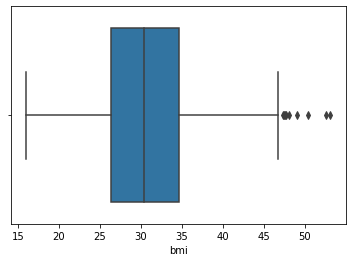

children


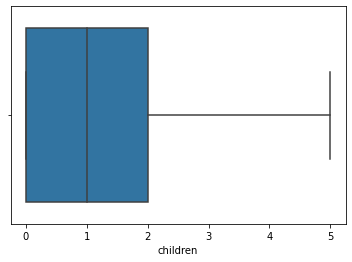

smoker


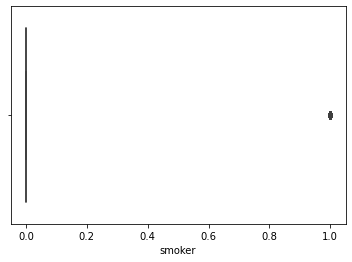

region


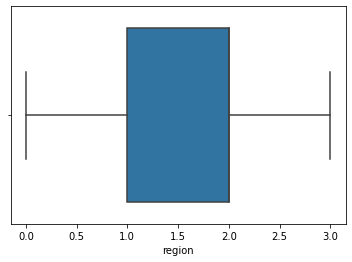

charges


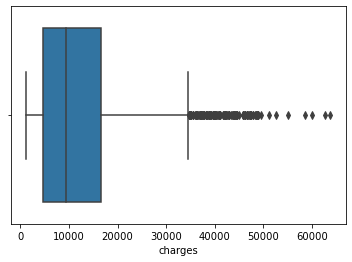

In [34]:
# Now check outliers in data
for x in df:
    print(x)
    plt.plot()
    plt.plot(figsize=(7,9))
    sns.boxplot(df[x])
    plt.show()

very less outliers in BMI deal with later

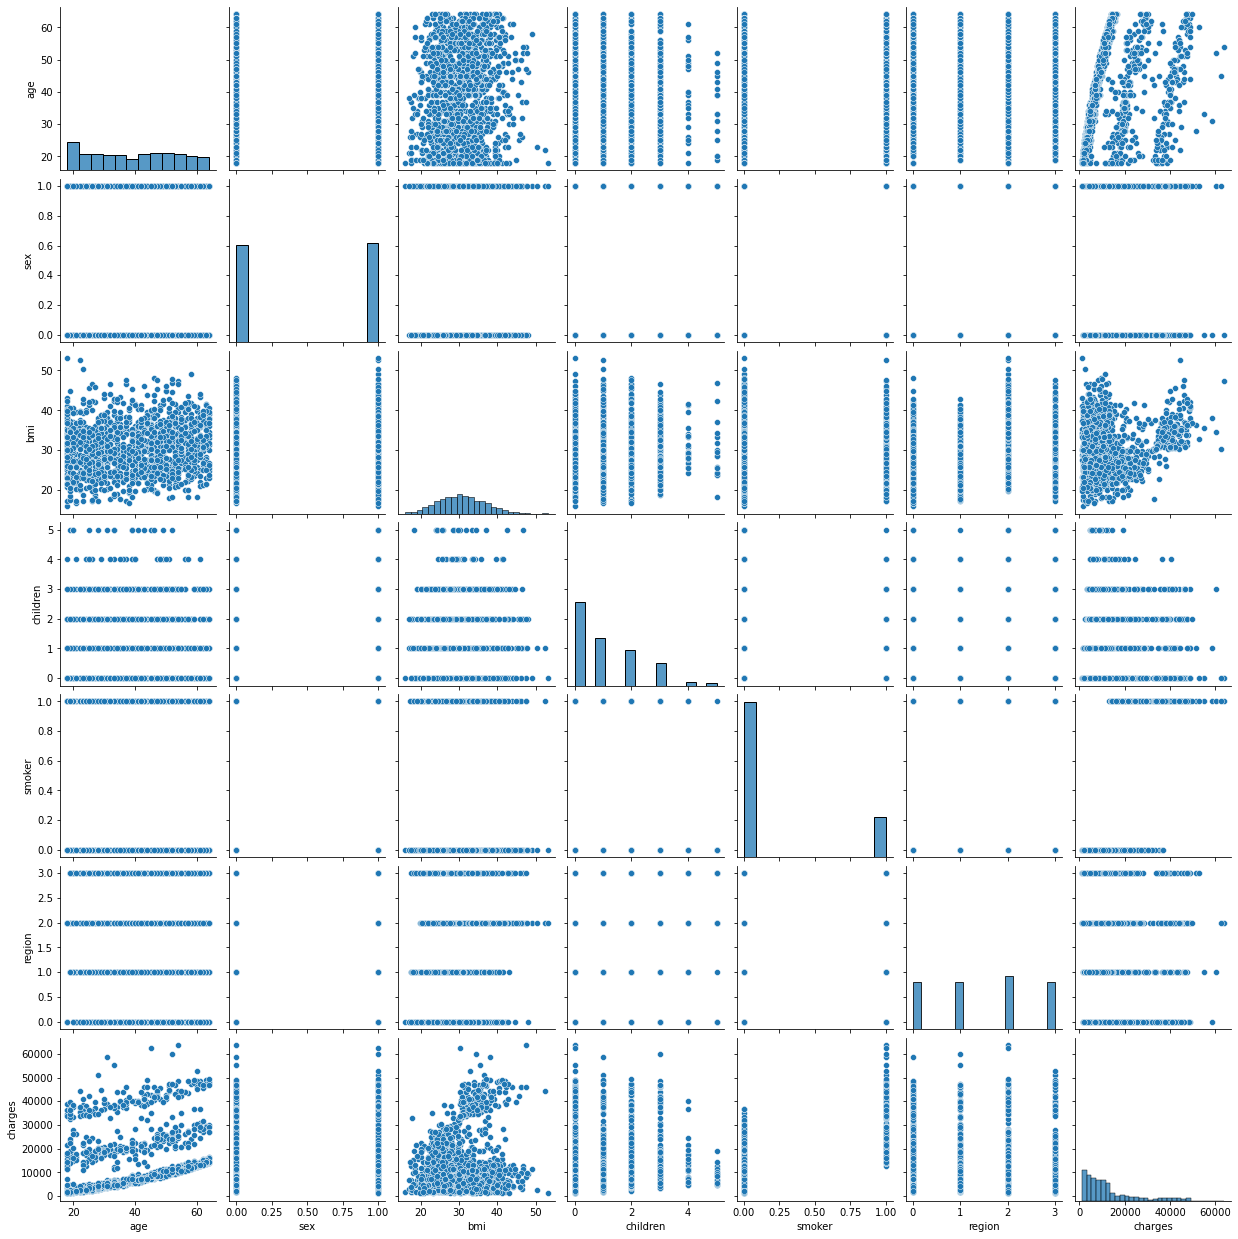

In [35]:
sns.pairplot(df)

not getting any significant pattern

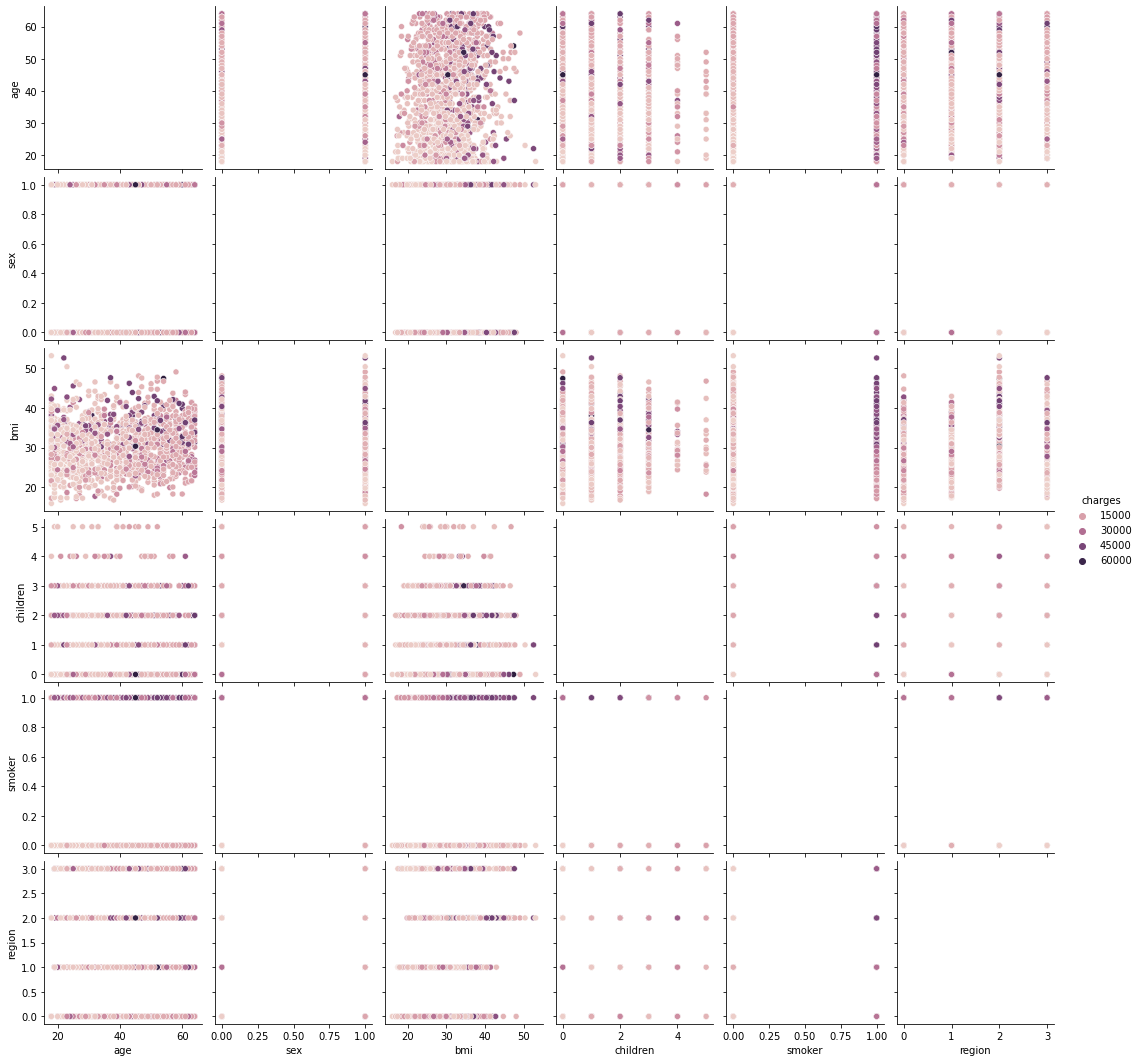

In [36]:
sns.pairplot(df,hue='charges')

# Removing Outliers

**Removing the outlier by Zscore method**

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
dfz=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-dfz.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.021674140508221227


**Removing the Outliers by IQR method**

In [38]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
dfiq=df[~((df <(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df.shape[0]-dfiq.shape[0])/df.shape[0])

percentage of loss of data by IQR is : 0.21150971599402094


As we compare Zscore and IQR observe that the less data loss in Zscore so we keep it

In [39]:
df=dfz.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [40]:
df.shape

(1309, 7)

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [42]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1.0,30.97,3,0.0,1.0,10600.5483
1334,18,0.0,31.92,0,0.0,0.0,2205.9808
1335,18,0.0,36.85,0,0.0,2.0,1629.8335
1336,21,0.0,25.80,0,0.0,3.0,2007.9450
1337,61,0.0,29.07,0,1.0,1.0,29141.3603


# split with target and feature

In [43]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [44]:
x.shape

(1309, 6)

In [45]:
y.shape

(1309,)

# Removing the skewness

In [46]:
x.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
dtype: float64

No need to remove skewness

# As we observe that our data is continues type so we have to use regression techniques

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [48]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod=lr
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8256637902479007 on random state 72


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=72)

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

pred_train=lr.predict(x_train)

0.8256637902479007


# Cross Validation model

In [52]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,11):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for traing is {Train_accuracy} and accuracy for the tsting is {Test_accuracy}")

At cross fold 2 the cv score is 0.7507263874653844 and accuracy score for traing is 0.7322433493305847 and accuracy for the tsting is 0.8256637902479007
At cross fold 3 the cv score is 0.7482863513140566 and accuracy score for traing is 0.7322433493305847 and accuracy for the tsting is 0.8256637902479007
At cross fold 4 the cv score is 0.7464940705596477 and accuracy score for traing is 0.7322433493305847 and accuracy for the tsting is 0.8256637902479007
At cross fold 5 the cv score is 0.7507037701961409 and accuracy score for traing is 0.7322433493305847 and accuracy for the tsting is 0.8256637902479007
At cross fold 6 the cv score is 0.7479467120567999 and accuracy score for traing is 0.7322433493305847 and accuracy for the tsting is 0.8256637902479007
At cross fold 7 the cv score is 0.7476013200228121 and accuracy score for traing is 0.7322433493305847 and accuracy for the tsting is 0.8256637902479007
At cross fold 8 the cv score is 0.7450165785585103 and accuracy score for traing i

Take CV=4

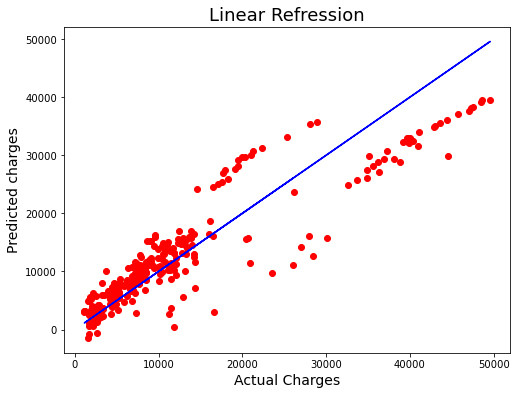

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Refression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [55]:
from sklearn.linear_model import Lasso
parameters={
    'alpha':[0.0001,0.001,0.01,0.1,1,10],
    'random_state':list(range(0,10))
}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [64]:
#final model training
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

73.22432538642478

In [65]:
lss=r2_score(y_test,pred_ls)
lss*100

82.56480727571132

In [66]:
cv_score=cross_val_score(ls,x,y,cv=4)
cv_mean=cv_score.mean()
cv_mean*100

74.64923612050252

This score is less as compare to linear

# Ensemble technique

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'criterion':['mse','mae'],
    'max_features':['auto','sqrt','log2']
}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)

In [68]:
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [69]:
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2_score: 88.85797699604923
Cross Val Score: 83.86463013270193


Our model accuracy is 89% and CVS is 84%

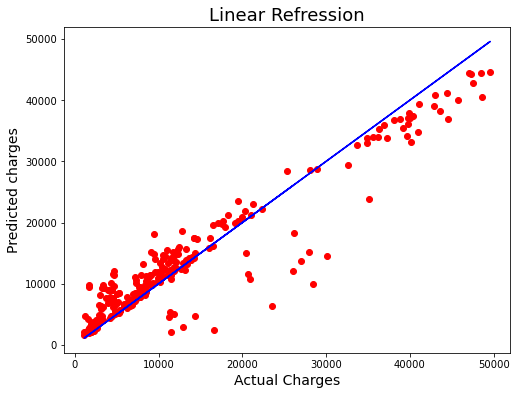

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Refression',fontsize=18)
plt.savefig('rfs.png')
plt.show()

In [71]:
import joblib
joblib.dump(rfs,'Medical_Cost.obj')

['Medical_Cost.obj']